# MPI

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from utils.mpi_utils import *
import math
import matplotlib.ticker as mtick

def py_dir(filename):
    return "./MST_O_logn_logn/" + filename 
    
def cpp_dir(filename):
    return "./MST_O_logn_logn_C-/csvs/" + filename

def cuda_dir(filename):
    return "./MST_O_logn_logn_Cuda/csvs/" + filename 

In [2]:
def n_edges(n):
    return n * (n - 1) / 2

def graph_size_scale(n, factor):
    return n_edges(n * factor) / n_edges(n)
# [1,
#  4.285714285714286,
#  17.714285714285715,
#  72.0,
#  290.2857142857143,
#  1165.7142857142858,
#  4672.0,
#  18706.285714285714,
#  74861.71428571429,
#  299520.0]
# It scales roughly 4 times
# t size of the result array
def scale_array(factor, start_n, t):
    result = [1]
    n = start_n
    for i in range(t - 1):
        result.append(graph_size_scale(n, factor) * result[-1])
        n *= factor
    return result 

In [3]:
scale_array(2, 8, 10)

[1,
 4.285714285714286,
 17.714285714285715,
 72.0,
 290.2857142857143,
 1165.7142857142858,
 4672.0,
 18706.285714285714,
 74861.71428571429,
 299520.0]

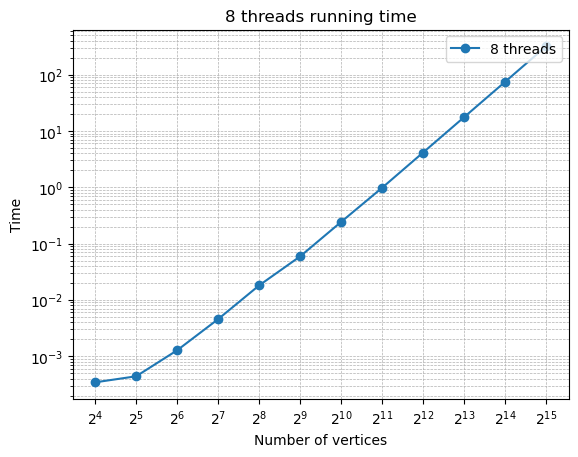

In [4]:
# TODO chart of time and memory
# 1 node 8 tasks 16 G
df = pd.read_csv(cpp_dir('n1_t8_composition.csv'))

width = 0.5

fig, ax = plt.subplots()

x = [fr'$2^{{{int(math.log2(n))}}}$' for n in df['num_vertices']]

# The runtime scales with the problem size and the complexity
# ideal_scale = [i * df['t_total'][0] for i in scale_array(2, 16, len(x))]

plt.plot(x, df['t_total'], label="8 threads", marker='o')
# plt.plot(x, ideal_scale, label="Ideal time", marker='o')

ax.set_title("8 threads running time")
ax.legend(loc="upper right")
plt.xlabel('Number of vertices')
plt.ylabel('Time')
plt.xticks(
    ticks=x,
    labels=x,
)
plt.grid(True, which="both", linestyle='--', linewidth=0.5)

plt.yscale('log')

# plt.yticks(
#     ticks=ideal_speedup,
#     labels=y,
# )

plt.savefig('figs/mpi_time_n1_t8.pdf', format="pdf", bbox_inches="tight")


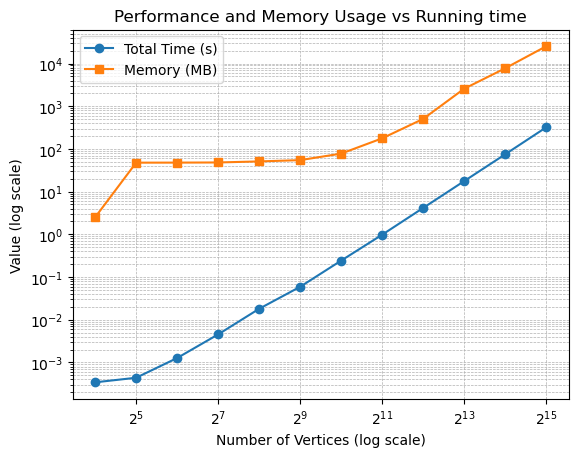

In [5]:
df = pd.read_csv(cpp_dir('n1_t8_composition.csv'))

data = df[["num_vertices", "t_total", "mem"]]

# Plotting
# plt.figure(figsize=(10, 6))

# Plot t_total(s)
plt.plot(data["num_vertices"], data["t_total"], marker='o', label='Total Time (s)')

# Plot mem(MB)
plt.plot(data["num_vertices"], data["mem"], marker='s', label='Memory (MB)')

# Log scale for better visualization
plt.xscale('log', base=2)
plt.yscale('log')

# Labels and title
plt.xlabel('Number of Vertices (log scale)')
plt.ylabel('Value (log scale)')
plt.title('Performance and Memory Usage vs Running time')
plt.legend()
plt.grid(True, which="both", linestyle='--', linewidth=0.5)

# Save the plot
plt.savefig('figs/time_mem_n1_t8_mem_vs_time.pdf', format="pdf", bbox_inches="tight")
plt.show()


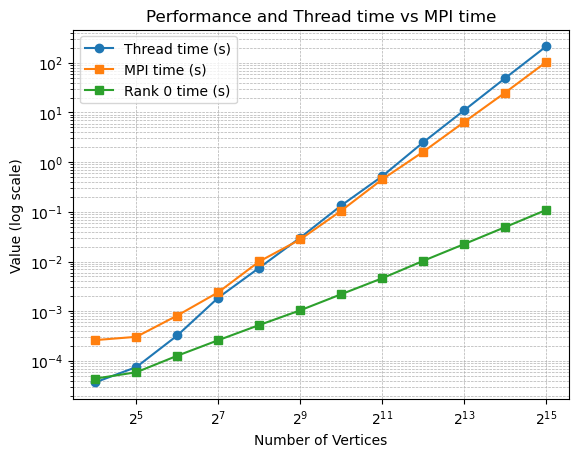

In [6]:
df = pd.read_csv(cpp_dir('n1_t8_composition.csv'))

# Plotting
# plt.figure(figsize=(10, 6))

plt.plot(data["num_vertices"], df["t_total"] - df["t_rank0"] - df["t_mpi"], marker='o', label='Thread time (s)')
plt.plot(data["num_vertices"], df["t_mpi"], marker='s', label='MPI time (s)')
plt.plot(data["num_vertices"], df["t_rank0"], marker='s', label='Rank 0 time (s)')

# Log scale for better visualization
plt.xscale('log', base=2)
plt.yscale('log')

# Labels and title
plt.xlabel('Number of Vertices')
plt.ylabel('Value (log scale)')
plt.title('Performance and Thread time vs MPI time')
plt.legend()
plt.grid(True, which="both", linestyle='--', linewidth=0.5)

# Save the plot
plt.savefig('figs/time_n1_t8_composition_time.pdf', format="pdf", bbox_inches="tight")
plt.show()


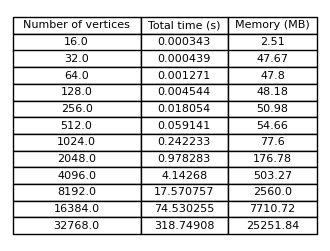

In [7]:
df = pd.read_csv(cpp_dir('n1_t8_composition.csv'))

data = df[["num_vertices", "t_total", "mem"]]

# Plotting
fig, ax = plt.subplots(figsize=(4, 3))
ax.axis('tight')
ax.axis('off')

table = ax.table(cellText=data.values, colLabels=["Number of vertices", "Total time (s)", "Memory (MB)"], loc='center', cellLoc='center')

# Style adjustments
table.auto_set_font_size(False)
table.set_fontsize(8)
table.auto_set_column_width(col=list(range(len(data.columns))))

# Save the table as an image
plt.savefig("figs/time_mem_n1_t8_table_mem_vs_time.pdf")
plt.show()


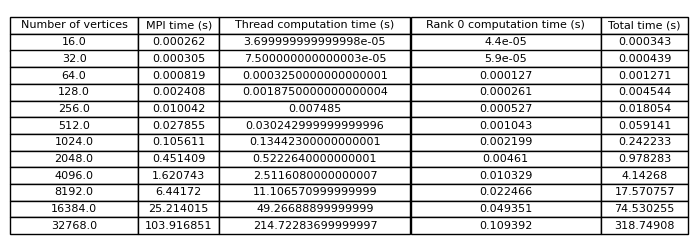

    num_vertices   t_rank0       t_mpi     t_total       mem    t_thread
0             16  0.000044    0.000262    0.000343      2.51    0.000037
1             32  0.000059    0.000305    0.000439     47.67    0.000075
2             64  0.000127    0.000819    0.001271     47.80    0.000325
3            128  0.000261    0.002408    0.004544     48.18    0.001875
4            256  0.000527    0.010042    0.018054     50.98    0.007485
5            512  0.001043    0.027855    0.059141     54.66    0.030243
6           1024  0.002199    0.105611    0.242233     77.60    0.134423
7           2048  0.004610    0.451409    0.978283    176.78    0.522264
8           4096  0.010329    1.620743    4.142680    503.27    2.511608
9           8192  0.022466    6.441720   17.570757   2560.00   11.106571
10         16384  0.049351   25.214015   74.530255   7710.72   49.266889
11         32768  0.109392  103.916851  318.749080  25251.84  214.722837


In [8]:
df = pd.read_csv(cpp_dir('n1_t8_composition.csv'))

df["t_thread"] = df["t_total"] - df["t_rank0"] - df["t_mpi"]

data = df[["num_vertices", "t_mpi", "t_thread", "t_rank0", "t_total"]]

# Plotting
fig, ax = plt.subplots(figsize=(4, 3))
ax.axis('tight')
ax.axis('off')

table = ax.table(cellText=data.values, colLabels=["Number of vertices", "MPI time (s)", "Thread computation time (s)", "Rank 0 computation time (s)", "Total time (s)"], loc='center', cellLoc='center')

# Style adjustments
table.auto_set_font_size(False)
table.set_fontsize(8)
table.auto_set_column_width(col=list(range(len(data.columns))))

# Save the table as an image
plt.savefig("figs/time_mem_n1_t8_table.pdf")
plt.show()
# print(df.to_html())
print(df)

In [9]:
def format_log(numbers):
    """
    Takes an iterable of integers and returns an array of LaTeX-formatted logarithms.

    Parameters:
        numbers (iterable of int): Iterable containing integers to compute the logarithm for.

    Returns:
        list of str: LaTeX-formatted strings representing the logarithms.
    """
    latex_logs = []
    for num in numbers:
        if num <= 0:
            raise ValueError(f"Logarithm undefined for non-positive number: {num}")
        log_value = math.log(num, 2)
        latex_logs.append(rf'$2^{{{int(log_value)}}}$')
    return latex_logs

In [10]:
def plot_composition(_dir, title, file):
    df = pd.read_csv(_dir)

    width = 0.5

    fig, ax = plt.subplots()

    t_parallel = df['t_total'] - df['t_mpi'] - df['t_rank0']
    mpi_fractions = df['t_mpi'] / df['t_total']
    rank0_fractions = df['t_rank0'] / df['t_total']
    parallel_fractions = t_parallel / df['t_total']

    x = df["num_vertices"].astype(str)

    p = ax.bar(x, mpi_fractions, width, label="MPI communication")
    p = ax.bar(x, parallel_fractions, width, label="Thread computation", bottom=mpi_fractions)
    p = ax.bar(x, rank0_fractions, width, label="Rank 0 computation", bottom=mpi_fractions + parallel_fractions)

    ax.set_title(title)
    ax.legend(loc="upper right")
    plt.xlabel('Number of Vertices')
    plt.ylabel('Composition (percentage)')
    plt.xticks(
        ticks=x,
        labels=format_log(df["num_vertices"]),
    )
    plt.grid(True, which="major", linestyle='--', linewidth=0.5)
    ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

    plt.savefig(file, format="pdf", bbox_inches="tight")

In [11]:
def plot_strong_scaling_composition(n_v):
    df = pd.read_csv(cpp_dir(f'strong_scale_{n_v}.csv'))

    width = 0.5

    fig, ax = plt.subplots()

    t_parallel = df['t_total'] - df['t_mpi'] - df['t_rank0']
    mpi_fractions = df['t_mpi'] / df['t_total']
    rank0_fractions = df['t_rank0'] / df['t_total']
    parallel_fractions = t_parallel / df['t_total']

    x = df['num_threads'].astype('string')

    p = ax.bar(x, mpi_fractions, width, label="MPI communication")
    p = ax.bar(x, parallel_fractions, width, label="Thread computation", bottom=mpi_fractions)
    p = ax.bar(x, rank0_fractions, width, label="Rank 0 computation", bottom=mpi_fractions + parallel_fractions)

    ax.set_title(f"MST_loglogn strong scaling time composition ({n_v} vertices)")
    ax.legend(loc="upper right")
    plt.xlabel('Number of Threads')
    plt.ylabel('Composition (percentage)')
    plt.xticks(
        ticks=x,
        labels=format_log(df['num_threads']),
    )
    plt.grid(True, which="major", linestyle='--', linewidth=0.5)
    ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))


    plt.savefig(f'figs/strong_scale_{n_v}_composition.pdf', format="pdf", bbox_inches="tight")

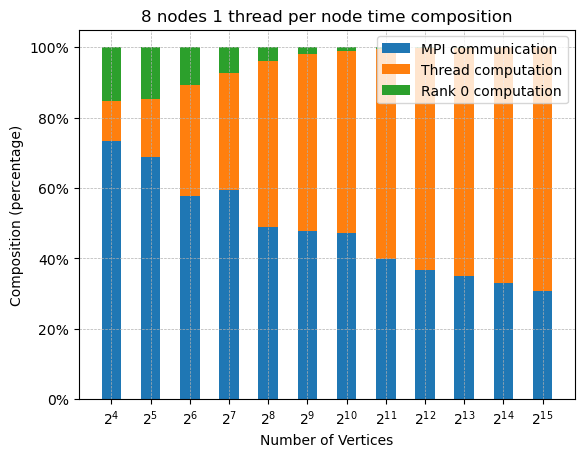

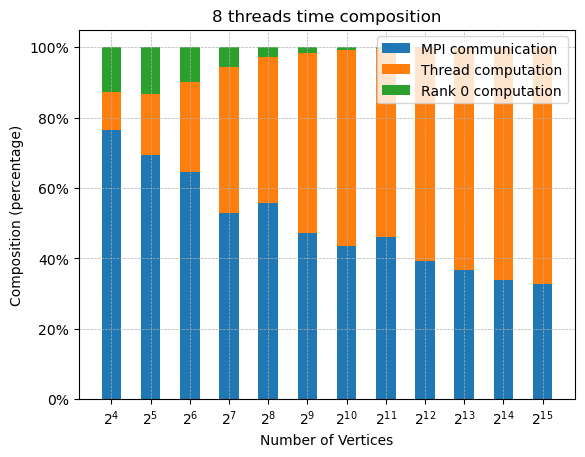

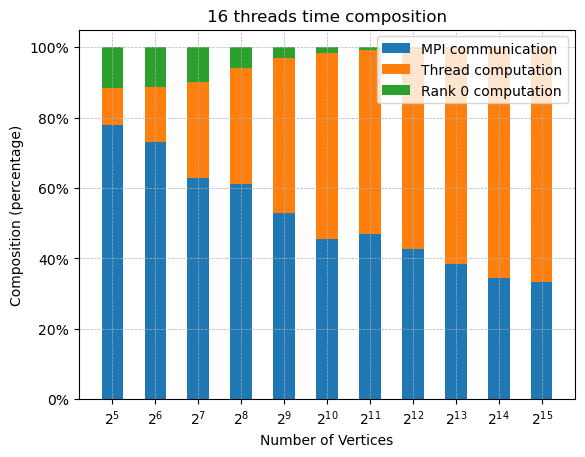

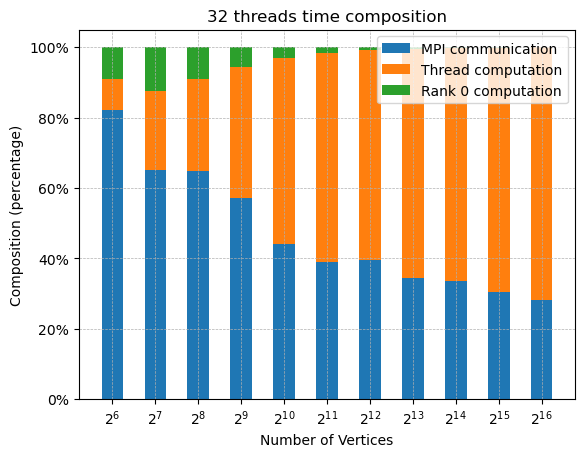

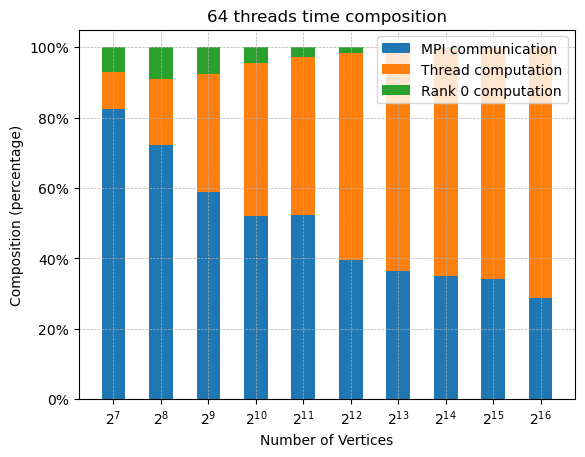

In [12]:
# TODO time grow
# 8 threads 16 G
plot_composition(
    _dir=cpp_dir('n8_t1_composition.csv'),
    title="8 nodes 1 thread per node time composition",
    file='figs/mpi_composition_n8_t1.pdf'
)

plot_composition(
    _dir=cpp_dir('n1_t8_composition.csv'),
    title="8 threads time composition",
    file='figs/mpi_composition_n1_t8.pdf'
)

# 16 tasks
plot_composition(
    _dir=cpp_dir('n1_t16_composition.csv'),
    title="16 threads time composition",
    file='figs/mpi_composition_n1_t16.pdf'
)

# 32 tasks
plot_composition(
    _dir=cpp_dir('n2_t16_composition.csv'),
    title="32 threads time composition",
    file='figs/mpi_composition_n2_t16.pdf'
)

# 64 tasks
plot_composition(
    _dir=cpp_dir('n4_t16_composition.csv'),
    title="64 threads time composition",
    file='figs/mpi_composition_n4_t16.pdf'
)

/home/tianxing/anaconda3/envs/machine_learning/lib/python3.7/site-packages/ipykernel_launcher.py:32: UserWarning: FixedFormatter should only be used together with FixedLocator


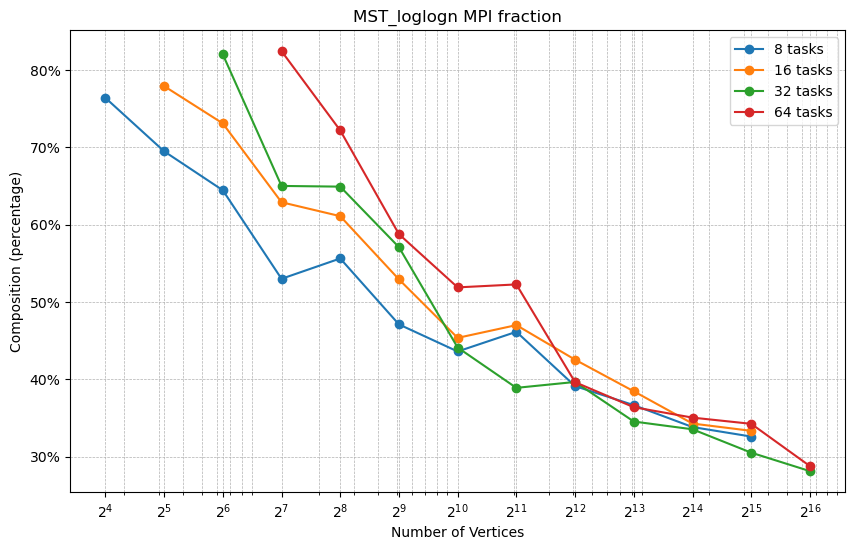

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

def get_mpi_fraction(df):
    return df['t_mpi'] / df['t_total']

df8 = pd.read_csv(cpp_dir('n1_t8_composition.csv'))
df16 = pd.read_csv(cpp_dir('n1_t16_composition.csv'))
df32 = pd.read_csv(cpp_dir('n2_t16_composition.csv'))
df64 = pd.read_csv(cpp_dir('n4_t16_composition.csv'))

num_vertices = [2**i for i in range(4, 17)]
x = tuple(num_vertices)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df8['num_vertices'], get_mpi_fraction(df8), label="8 tasks", marker='o')
plt.plot(df16['num_vertices'], get_mpi_fraction(df16), label="16 tasks", marker='o')
plt.plot(df32['num_vertices'], get_mpi_fraction(df32), label="32 tasks", marker='o')
plt.plot(df64['num_vertices'], get_mpi_fraction(df64), label="64 tasks", marker='o')

plt.legend(loc="upper right")
plt.title("MST_loglogn MPI fraction")
plt.xlabel('Number of Vertices')
plt.ylabel('Composition (percentage)')
plt.xscale('log')
plt.xticks(
    ticks=x,
    labels=format_log(num_vertices),
)
plt.grid(True, which="both", linestyle='--', linewidth=0.5)
plt.gca().set_yticklabels([f'{x:.0%}' for x in plt.gca().get_yticks()]) 

# plt.yscale('log')

plt.savefig('figs/mpi_num_tasks_fraction.pdf', format="pdf", bbox_inches="tight")


/home/tianxing/anaconda3/envs/machine_learning/lib/python3.7/site-packages/ipykernel_launcher.py:32: UserWarning: FixedFormatter should only be used together with FixedLocator


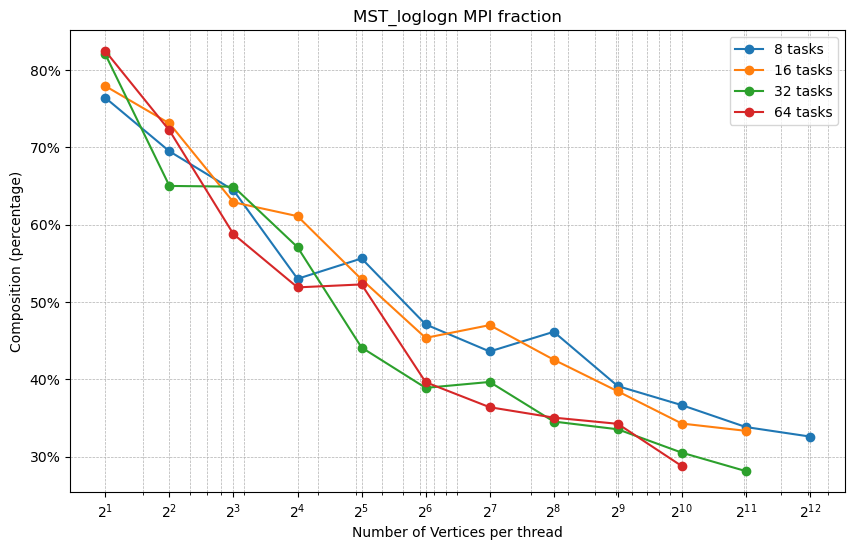

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

def get_mpi_fraction(df):
    return df['t_mpi'] / df['t_total']

df8 = pd.read_csv(cpp_dir('n1_t8_composition.csv'))
df16 = pd.read_csv(cpp_dir('n1_t16_composition.csv'))
df32 = pd.read_csv(cpp_dir('n2_t16_composition.csv'))
df64 = pd.read_csv(cpp_dir('n4_t16_composition.csv'))

num_vertices = [2**i for i in range(1, 13)]
x = tuple(num_vertices)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df8['num_vertices'] / 8, get_mpi_fraction(df8), label="8 tasks", marker='o')
plt.plot(df16['num_vertices'] / 16, get_mpi_fraction(df16), label="16 tasks", marker='o')
plt.plot(df32['num_vertices'] / 32, get_mpi_fraction(df32), label="32 tasks", marker='o')
plt.plot(df64['num_vertices'] / 64, get_mpi_fraction(df64), label="64 tasks", marker='o')

plt.legend(loc="upper right")
plt.title("MST_loglogn MPI fraction")
plt.xlabel('Number of Vertices per thread')
plt.ylabel('Composition (percentage)')
plt.xscale('log')
plt.xticks(
    ticks=x,
    labels=format_log(num_vertices),
)
plt.grid(True, which="both", linestyle='--', linewidth=0.5)
plt.gca().set_yticklabels([f'{x:.0%}' for x in plt.gca().get_yticks()]) 

# plt.yscale('log')

plt.savefig('figs/mpi_num_tasks_fraction_per_rank.pdf', format="pdf", bbox_inches="tight")


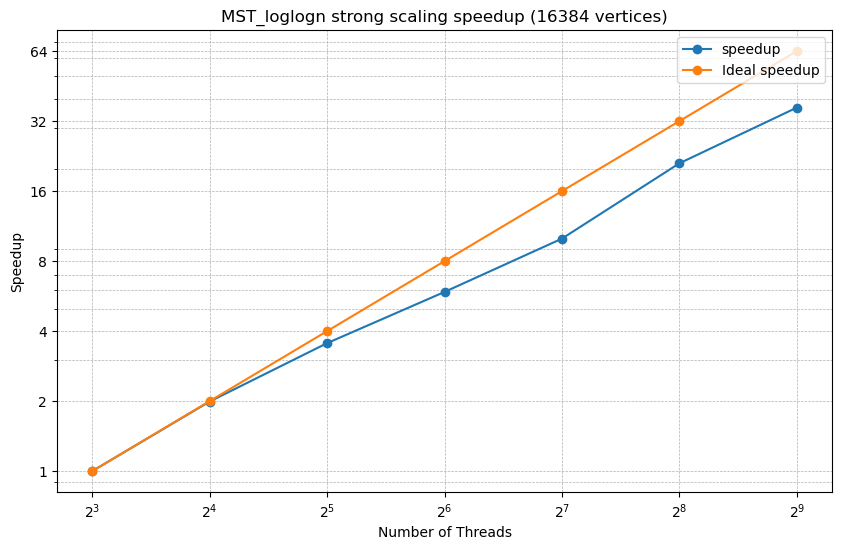

In [15]:
total = 16384
df = pd.read_csv(cpp_dir(f'strong_scale_{total}.csv'))

x = df['num_threads'].astype('string')
ideal_speedup = [2**i for i in range(len(df['t_mpi']))]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(x, df['speed_up'], label="speedup", marker='o')
plt.plot(x, ideal_speedup, label="Ideal speedup", marker='o')

plt.legend(loc="upper right")
plt.title(f"MST_loglogn strong scaling speedup ({total} vertices)")
plt.xlabel('Number of Threads')
plt.ylabel('Speedup')

y = [str(i) for i in ideal_speedup]
plt.yscale('log')

plt.yticks(
    ticks=ideal_speedup,
    labels=y,
)
plt.xticks(
    ticks=x,
    labels=format_log(df['num_threads']),
)
plt.grid(True, which="both", linestyle='--', linewidth=0.5)


plt.savefig(f'figs/strong_scale_{total}_speedup.pdf', format="pdf", bbox_inches="tight")


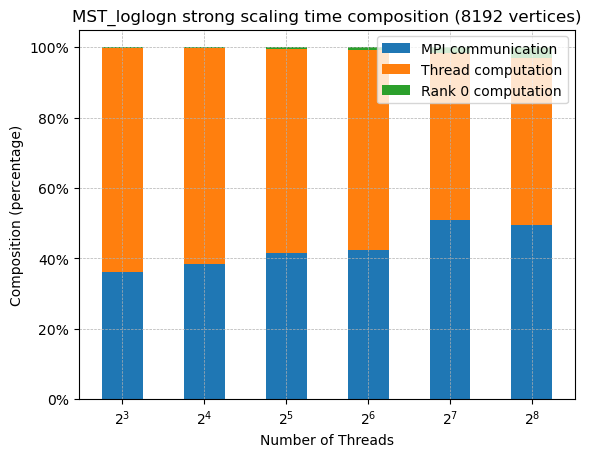

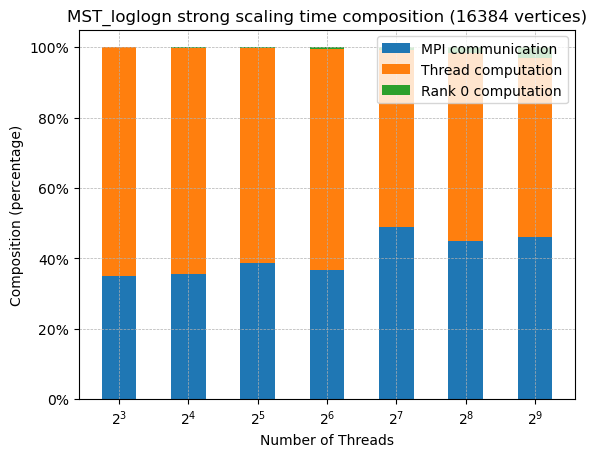

In [16]:
plot_strong_scaling_composition(8192)
plot_strong_scaling_composition(16384)


In [17]:
df

,num_threads,t_total,t_mpi,t_rank0,num_vertices_local,speed_up,efficiency
0,8,75.86680,26.559400,0.050300,2048,1.0000,1.0000
1,16,38.07000,13.512700,0.049600,1024,1.9923,0.9962
2,32,21.36280,8.282900,0.053900,512,3.5509,0.8877
3,64,12.86680,4.709200,0.061600,256,5.8964,0.7371
4,128,7.58920,3.703200,0.065000,128,9.9967,0.6248
5,256,3.60000,1.619600,0.064700,64,21.0738,0.6586
6,512,2.07439,0.955879,0.061206,32,36.5800,0.5716


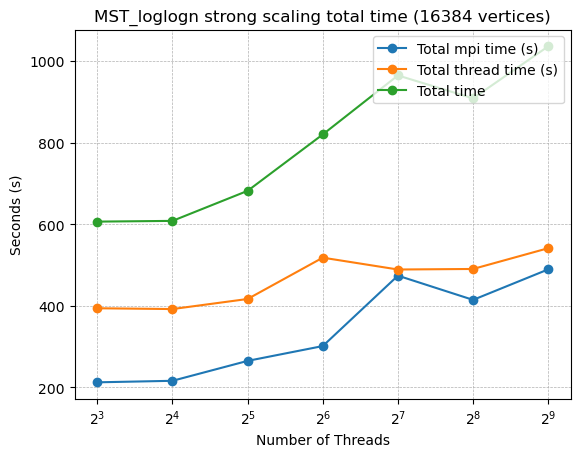

In [18]:
total=16384

df = pd.read_csv(cpp_dir(f'strong_scale_{total}.csv'))

width = 0.5

fig, ax = plt.subplots()
df['t_thread'] = df['t_total'] - df['t_mpi'] - df['t_rank0']

x = df['num_threads'].astype('string')
total_time = [int(x[i]) * (df['t_total'][i] - df['t_rank0'][0]) for i in range(len(x))]
total_mpi_time = [int(x[i]) * df['t_mpi'][i] for i in range(len(x))]
total_rank0_time = [int(x[i]) * df['t_thread'][i] for i in range(len(x))]

plt.plot(x, total_mpi_time, label="Total mpi time (s)", marker='o')
plt.plot(x, total_rank0_time, label="Total thread time (s)", marker='o')
plt.plot(x, total_time, label="Total time", marker='o')

ax.set_title(f"MST_loglogn strong scaling total time ({total} vertices)")
ax.legend(loc="upper right")
plt.xlabel('Number of Threads')
plt.ylabel('Seconds (s)')
plt.xticks(
    ticks=x,
    labels=format_log(df['num_threads']),
)
plt.grid(True, which="both", linestyle='--', linewidth=0.5)


plt.savefig(f'figs/strong_scale_{total}_total_time.pdf', format="pdf", bbox_inches="tight")

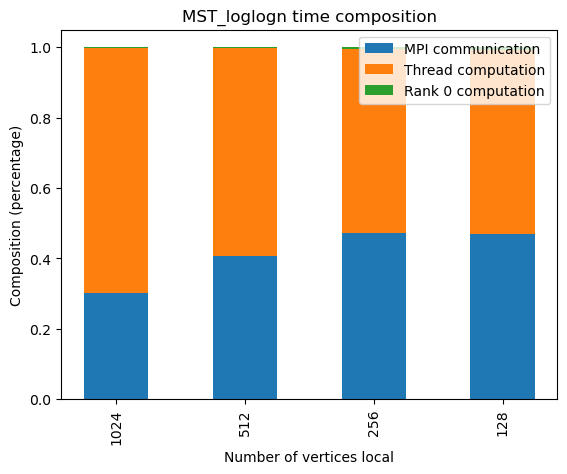

In [19]:
df = pd.read_csv(cpp_dir('weak_scale_1024.csv'))

width = 0.5

fig, ax = plt.subplots()

t_parallel = df['t_total'] - df['t_mpi'] - df['t_rank0']
mpi_fractions = df['t_mpi'] / df['t_total']
rank0_fractions = df['t_rank0'] / df['t_total']
parallel_fractions = t_parallel / df['t_total']

x = tuple([str(i) for i in df['num_vertices_local']])

p = ax.bar(x, mpi_fractions, width, label="MPI communication")
p = ax.bar(x, parallel_fractions, width, label="Thread computation", bottom=mpi_fractions)
p = ax.bar(x, rank0_fractions, width, label="Rank 0 computation", bottom=mpi_fractions + parallel_fractions)

ax.set_title("MST_loglogn time composition")
ax.legend(loc="upper right")
plt.xlabel('Number of vertices local')
plt.ylabel('Composition (percentage)')
plt.xticks(
    ticks=x,
    labels=df["num_vertices_local"].astype(str),
    rotation=90
)


plt.savefig('figs/weak_scale_1024_composition.pdf', format="pdf", bbox_inches="tight")

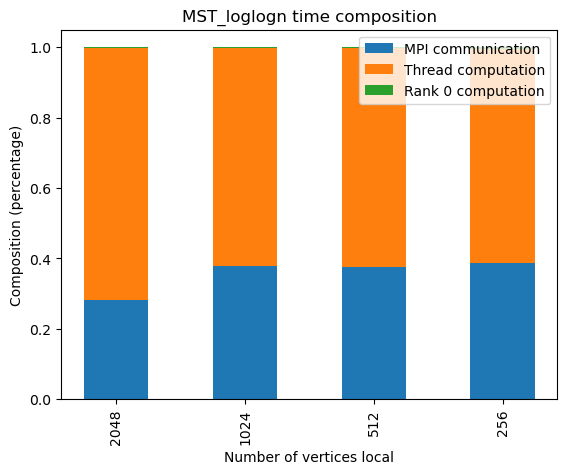

In [20]:
df = pd.read_csv(cpp_dir('weak_scale_2048.csv'))

width = 0.5

fig, ax = plt.subplots()

t_parallel = df['t_total'] - df['t_mpi'] - df['t_rank0']
mpi_fractions = df['t_mpi'] / df['t_total']
rank0_fractions = df['t_rank0'] / df['t_total']
parallel_fractions = t_parallel / df['t_total']

x = tuple([str(i) for i in df['num_vertices_local']])

p = ax.bar(x, mpi_fractions, width, label="MPI communication")
p = ax.bar(x, parallel_fractions, width, label="Thread computation", bottom=mpi_fractions)
p = ax.bar(x, rank0_fractions, width, label="Rank 0 computation", bottom=mpi_fractions + parallel_fractions)

ax.set_title("MST_loglogn time composition")
ax.legend(loc="upper right")
plt.xlabel('Number of vertices local')
plt.ylabel('Composition (percentage)')
plt.xticks(
    ticks=x,
    labels=df["num_vertices_local"].astype(str),
    rotation=90
)


plt.savefig('figs/weak_scale_2048_composition.pdf', format="pdf", bbox_inches="tight")

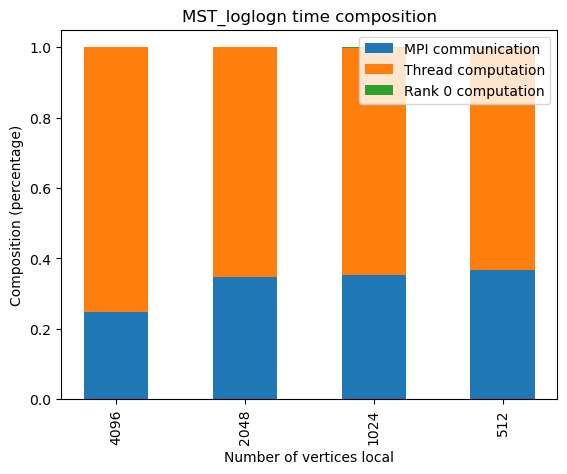

In [21]:
df = pd.read_csv(cpp_dir('weak_scale_4096.csv'))

width = 0.5

fig, ax = plt.subplots()

t_parallel = df['t_total'] - df['t_mpi'] - df['t_rank0']
mpi_fractions = df['t_mpi'] / df['t_total']
rank0_fractions = df['t_rank0'] / df['t_total']
parallel_fractions = t_parallel / df['t_total']

x = tuple([str(i) for i in df['num_vertices_local']])

p = ax.bar(x, mpi_fractions, width, label="MPI communication")
p = ax.bar(x, parallel_fractions, width, label="Thread computation", bottom=mpi_fractions)
p = ax.bar(x, rank0_fractions, width, label="Rank 0 computation", bottom=mpi_fractions + parallel_fractions)

ax.set_title("MST_loglogn time composition")
ax.legend(loc="upper right")
plt.xlabel('Number of vertices local')
plt.ylabel('Composition (percentage)')
plt.xticks(
    ticks=x,
    labels=df["num_vertices_local"].astype(str),
    rotation=90
)


plt.savefig('figs/weak_scale_4096_composition.pdf', format="pdf", bbox_inches="tight")

In [22]:
df = pd.read_csv(cpp_dir('n1_t8_16384_details.csv'))

df

# width = 0.5

# fig, ax = plt.subplots()

# t_parallel = df['t_total'] - df['t_mpi'] - df['t_rank0']

# x = tuple([str(i) for i in df['round']])

# p = ax.bar(x, df['t_mpi'], width, label="MPI communication")
# p = ax.bar(x, t_parallel, width, label="Thread computation", bottom=df['t_mpi'])
# p = ax.bar(x, df['t_rank0'], width, label="Rank 0 computation", bottom=df['t_mpi'] + t_parallel)

# ax.set_title("MST_loglogn time composition")
# ax.legend(loc="upper right")
# plt.xlabel('Number of vertices local')
# plt.ylabel('Composition (percentage)')
# plt.xticks(
#     ticks=x,
#     labels=df["round"].astype(str),
#     rotation=90
# )


# plt.savefig('figs/weak_scale_4096_composition.pdf', format="pdf", bbox_inches="tight")

,round,t_total,t_mpi,t_rank0,comm0,comm1,comm2,comm3,comm4,Unnamed: 9
0,0,0.269912,0.016429,0.031226,0.016167,0.000000,0.000000,0.000000,0.000262,NaN
1,1,65.740569,28.408219,0.018042,0.000000,22.308387,6.070146,0.016727,0.012958,NaN
2,2,16.847224,1.112870,0.007869,0.000000,0.839080,0.261229,0.012401,0.000160,NaN


In [28]:
df = pd.read_csv(cpp_dir('n1_t8_16384_details_original.csv'))

df

,round,t_total,t_mpi,t_rank0,comm0,comm1,comm2,comm3,comm4,Unnamed: 9
0,0,181.639655,86.475584,0.000091,0.0,85.952074,0.475076,0.000140,0.048293,NaN
1,1,182.241334,87.643035,0.027080,0.0,86.605947,0.575309,0.411575,0.050204,NaN
2,2,61.494299,23.359498,0.016600,0.0,21.780302,1.550374,0.014818,0.014004,NaN
3,3,15.845272,0.897462,0.007058,0.0,0.781388,0.105385,0.010515,0.000174,NaN


In [30]:
df_8192 = pd.read_csv(cpp_dir('strong_scale_8192.csv'))
df_16384 = pd.read_csv(cpp_dir('strong_scale_16384.csv'))
df_32768 = pd.read_csv(cpp_dir('strong_scale_32768.csv'))

x = df_32768["num_threads"]
# 8, 16, 32, ..., 128, 256

ideal_speedup = [2**i for i in range(len(df_8192['t_mpi']))]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(x, ideal_speedup, label='Ideal speedup', marker='.', linestyle="--")
plt.plot(x, get_strong_scaling_speed_up(df_8192['t_total']), label='8192 vertices speedup', marker='o')
plt.plot(x, get_strong_scaling_speed_up(df_16384['t_total']), label='16384 vertices speedup', marker='o')
plt.plot(x, get_strong_scaling_speed_up(df_32768['t_total']), label='32768 vertices speedup', marker='o')

plt.xlabel('Number of threads')
plt.ylabel('Speed up factor (compared to 8 tasks)')
plt.title('MST_loglogn MPI Strong scaling speedup')
plt.xscale('log')
plt.yscale('log')

plt.legend()
plt.grid(True, which="both", ls="--")

plt.xticks(x, x)
plt.yticks(ideal_speedup, ideal_speedup)

plt.savefig('figs/mpi_cpp_strong_scaling.pdf', format="pdf", bbox_inches="tight")
plt.show()

In [31]:
df_prim_py = pd.read_csv(cpp_dir('prim.csv'))

df_mpi_4_py = pd.read_csv(cpp_dir('dist_n1_t4.csv'))
df_mpi_8_py = pd.read_csv(cpp_dir('dist_n1_t8.csv'))
df_mpi_16_py = pd.read_csv(cpp_dir('dist_n1_t16.csv'))
df_mpi_32_py = pd.read_csv(cpp_dir('dist_n2_t16.csv'))
df_mpi_64_py = pd.read_csv(cpp_dir('dist_n4_t16.csv'))

ticks = [8]
while ticks[-1] <2 ** 16:
    ticks.append(ticks[-1] * 2)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df_prim_py['num_vertices'], df_prim_py['t_prim'], label="prim's algo", marker='o')
plt.plot(df_mpi_4_py['num_vertices'], df_mpi_4_py['t_mpi'], label="MST_loglogn 4 threads", marker='^')
plt.plot(df_mpi_8_py['num_vertices'], df_mpi_8_py['t_mpi'], label="MST_loglogn 8 threads", marker='^')
plt.plot(df_mpi_16_py['num_vertices'], df_mpi_16_py['t_mpi'], label="MST_loglogn 16 threads", marker='^')
plt.plot(df_mpi_32_py['num_vertices'], df_mpi_32_py['t_mpi'], label="MST_loglogn 32 threads", marker='^')
plt.plot(df_mpi_64_py['num_vertices'], df_mpi_64_py['t_mpi'], label="MST_loglogn 64 threads", marker='^')

plt.xlabel('Number of vertices')
plt.ylabel('Time (s)')
plt.title("Prim's vs MST_loglogn MPI performance")
plt.legend()

plt.xscale('log')
plt.yscale('log')

plt.xticks((ticks), format_log(ticks))

plt.grid(True, which="both", ls="--")
plt.savefig("figs/prim's_vs_A.pdf", format="pdf", bbox_inches="tight")


In [ ]:
df_weak_1024 = pd.read_csv(cpp_dir('weak_scale_1024.csv'))
df_weak_2048 = pd.read_csv(cpp_dir('weak_scale_2048.csv'))
df_weak_4096 = pd.read_csv(cpp_dir('weak_scale_4096.csv'))

speedup_1024 = get_weak_scaling_speedup(df_weak_1024)
speedup_2048 = get_weak_scaling_speedup(df_weak_2048)
speedup_4096 = get_weak_scaling_speedup(df_weak_4096)

x = df_weak_1024["num_threads"]
# 8, 16, 32, ..., 128, 256

ideal_speedup = [4**i for i in range(len(df_weak_1024['t_mpi']))]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(x, ideal_speedup, label='Ideal speedup', marker='.', linestyle="--")
plt.plot(x, speedup_1024, label='1024-vertices-2-threads speedup', marker='o')
plt.plot(x, speedup_2048, label='2048-vertices-2-threads speedup', marker='o')
plt.plot(x, speedup_4096, label='4096-vertices-2-threads speedup', marker='o')

plt.xlabel('Number of threads')
plt.ylabel('Speed up factor (initial tasks)')
plt.title('MST_loglogn MPI weak scaling speedup')

plt.xscale('log')
plt.yscale('log')

plt.legend()
plt.grid(True, which="both", ls="--")

plt.xticks(x, x)
plt.yticks(ideal_speedup, ideal_speedup)

plt.savefig('figs/mpi_cpp_weak_scaling.pdf', format="pdf", bbox_inches="tight")


In [ ]:
df_prim = pd.read_csv(cpp_dir('prim.csv'))

df_mpi_4 = pd.read_csv(cpp_dir('dist_n1_t4.csv'))
df_mpi_8 = pd.read_csv(cpp_dir('dist_n1_t8.csv'))
df_mpi_16 = pd.read_csv(cpp_dir('dist_n1_t16.csv'))
df_mpi_32 = pd.read_csv(cpp_dir('dist_n2_t16.csv'))
df_mpi_64 = pd.read_csv(cpp_dir('dist_n4_t16.csv'))

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df_prim['num_vertices'], df_prim['t_prim'], label="prim's algo", marker='o')
plt.plot(df_mpi_4['num_vertices'], df_mpi_4['t_mpi'], label="MST_loglogn 4 threads", marker='^')
plt.plot(df_mpi_8['num_vertices'], df_mpi_8['t_mpi'], label="MST_loglogn 8 threads", marker='^')
plt.plot(df_mpi_16['num_vertices'], df_mpi_16['t_mpi'], label="MST_loglogn 16 threads", marker='^')
plt.plot(df_mpi_32['num_vertices'], df_mpi_32['t_mpi'], label="MST_loglogn 32 threads", marker='^')
plt.plot(df_mpi_64['num_vertices'], df_mpi_64['t_mpi'], label="MST_loglogn 64 threads", marker='^')

plt.xlabel('Number of vertices')
plt.ylabel('Time (s)')
plt.title("Prim's vs MST_loglogn MPI runtime")
plt.legend()
plt.grid(True, which="both", ls="--")
plt.savefig("figs/prim's_vs_MST_loglogn.pdf", format="pdf", bbox_inches="tight")


In [ ]:
df_prim = pd.read_csv(cpp_dir('prim.csv'))

df_mpi_1 = pd.read_csv(cpp_dir('n1_t1.csv'))

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df_prim['num_vertices'], df_prim['t_prim'], label="prim's algo", marker='o')
plt.plot(df_mpi_1['num_vertices'], df_mpi_1['t_total'], label="MST_loglogn 1 thread", marker='o')

plt.xlabel('Number of vertices')
plt.ylabel('Time (s)')
plt.title("Prim's vs MST_loglogn MPI single thread runtime")
plt.legend()

plt.xscale('log')
plt.yscale('log')
plt.xticks(df_prim['num_vertices'], format_log(df_prim['num_vertices']))

plt.grid(True, which="both", ls="--")
plt.savefig("figs/prim's_vs_MST_loglogn_single_thread.pdf", format="pdf", bbox_inches="tight")


In [ ]:
df_py = pd.read_csv(py_dir('dist_n1_t8_double.csv'))

df_cpp = pd.read_csv(cpp_dir('n1_t8_composition.csv'))

x = df_py["num_vertices"]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(x, df_py['t_total'], label='MST_loglogn python total time', marker='o')
# plt.plot(x, df_py['t_mpi'], label='MST_loglogn python mpi time', marker='o')
# plt.plot(x, df_py['t_rank0'], label='MST_loglogn python rank0 time', marker='o')
# plt.plot(x, df_py['t_parallel'], label='MST_loglogn python parallel time', marker='o')

plt.plot(x, df_cpp['t_total'], label='MST_loglogn cpp total time', marker='o')
# plt.plot(x, df_cpp['t_mpi'], label='MST_loglogn cpp mpi time', marker='o')
# plt.plot(x, df_cpp['t_rank0'], label='MST_loglogn cpp rank0 time', marker='o')
# plt.plot(x, df_cpp['t_parallel'], label='MST_loglogn cpp parallel time', marker='o')
plt.xscale('log', base=2)
plt.yscale('log')
plt.grid(True, which="both", linestyle='--', linewidth=0.5)

plt.xlabel('Number of vertices')
plt.ylabel('Time (s)')
plt.title("MST_loglogn runtime MPI (python vs c++)")
plt.legend()
plt.savefig("figs/n1_t8_cpp_vs_python_total.pdf", format="pdf", bbox_inches="tight")

In [ ]:
df_py = pd.read_csv(py_dir('dist_n1_t8_double.csv'))

df_cpp = pd.read_csv(cpp_dir('n1_t8_composition.csv'))

x = df_py["num_vertices"]

runtime_factor = (df_py['t_total'] / df_cpp['t_total'])[1:]
print(runtime_factor)
plt.plot(x[1:], runtime_factor, label='MST_loglogn cpp total time', marker='o')
plt.xscale('log', base=2)
plt.grid(True, which="both", ls="--")
plt.show()

In [ ]:
df_py = pd.read_csv(py_dir('dist_n1_t8_double.csv'))
df_cpp = pd.read_csv(cpp_dir('n1_t8_composition.csv'))

x = df_py["num_vertices"]

py_parallel = df_py['t_total'] - df_py['t_mpi'] - df_py['t_rank0']
cpp_parallel = df_cpp['t_total'] - df_cpp['t_mpi'] - df_cpp['t_rank0']

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(x, df_py['t_mpi'], label='MST_loglogn python mpi time', marker='o', color="#1f77b4")
plt.plot(x, df_py['t_rank0'], label='MST_loglogn python rank0 time', marker='o', color="#9467bd")
plt.plot(x, py_parallel, label='MST_loglogn python parallel time', marker='o', color="#ff7f0e")

plt.plot(x, df_cpp['t_mpi'], label='MST_loglogn cpp mpi time', marker='^', color="#1f77b4")
plt.plot(x, df_cpp['t_rank0'], label='MST_loglogn cpp rank0 time', marker='^', color="#9467bd")
plt.plot(x, cpp_parallel, label='MST_loglogn cpp parallel time', marker='^', color="#ff7f0e")
plt.xscale('log', base=2)
plt.yscale('log')
plt.grid(True, which="both", linestyle='--', linewidth=0.5)

plt.xlabel('Number of vertices')
plt.ylabel('Time (s)')
plt.title("MST_loglogn runtime MPI (python vs c++)")
plt.legend()
plt.savefig("figs/n1_t8_cpp_vs_python_composition.pdf", format="pdf", bbox_inches="tight")

In [ ]:
print(df_py)
print(df_cpp)

Try to answer:
* Reason behind each fraction's time portion, trend
* How is this related to Congested clique.

In [ ]:
df = pd.read_csv(cuda_dir('complete_composition.csv'))

width = 0.5

fig, ax = plt.subplots()

total = df['t_cpu'] + df['t_min_from_cluster_kernel'] + df['t_min_to_cluster_kernel'] + df['t_DtoH'] + df['t_HtoD']

cpu_fractions = df['t_cpu'] / total
min_from_cluster_fractions = df['t_min_from_cluster_kernel'] / total
min_to_cluster_fractions = df['t_min_to_cluster_kernel'] / total
DtoH_fractions = df['t_DtoH'] / total
HtoD_fractions = df['t_HtoD'] / total

fractions = [cpu_fractions, min_from_cluster_fractions, min_to_cluster_fractions, DtoH_fractions, HtoD_fractions] 
fractions_name = ["cpu", "kernel_min_from_cluster", "kernel_min_to_cluster", "DtoH", "HtoD"]
x = tuple([str(i) for i in df['num_vertices']])

# Draw bar
for i in range(len(fractions)):
    if i == 0:
        ax.bar(x, fractions[i], width, label=fractions_name[i])
        fractions_sum = fractions[i]
    else:
        ax.bar(x, fractions[i], width, label=fractions_name[i], bottom=fractions_sum)
        fractions_sum += fractions[i]

ax.set_title("MST_loglogn CUDA time composition (complete graph)")
ax.legend(loc="upper right")
plt.xlabel('Number of vertices')
plt.ylabel('Composition (percentage)')
plt.xticks(
    ticks=x,
    labels=df["num_vertices"].astype(str),
    rotation=90
)


plt.savefig('figs/mpi_composition_cuda_complete.pdf', format="pdf", bbox_inches="tight")


In [ ]:
def cuda_total_time(df):
    return df['t_cpu'] + df['t_min_from_cluster_kernel'] + df['t_min_to_cluster_kernel'] + df['t_DtoH'] + df['t_HtoD']

In [ ]:
df = pd.read_csv(cuda_dir('sparse100_composition.csv'))

width = 0.5

fig, ax = plt.subplots()

total = cuda_total_time(df)

cpu_fractions = df['t_cpu'] / total
min_from_cluster_fractions = df['t_min_from_cluster_kernel'] / total
min_to_cluster_fractions = df['t_min_to_cluster_kernel'] / total
DtoH_fractions = df['t_DtoH'] / total
HtoD_fractions = df['t_HtoD'] / total

fractions = [cpu_fractions, min_from_cluster_fractions, min_to_cluster_fractions, DtoH_fractions, HtoD_fractions] 
fractions_name = ["cpu", "kernel_min_from_cluster", "kernel_min_to_cluster", "DtoH", "HtoD"]
x = tuple([str(i) for i in df['num_vertices']])

# Draw bar
for i in range(len(fractions)):
    if i == 0:
        ax.bar(x, fractions[i], width, label=fractions_name[i])
        fractions_sum = fractions[i]
    else:
        ax.bar(x, fractions[i], width, label=fractions_name[i], bottom=fractions_sum)
        fractions_sum += fractions[i]

ax.set_title("MST_loglogn CUDA time composition (sparse100 graph)")
ax.legend(loc="upper right")
plt.xlabel('Number of vertices')
plt.ylabel('Composition (percentage)')
plt.xticks(
    ticks=x,
    labels=df["num_vertices"].astype(str),
    rotation=90
)


plt.savefig('figs/mpi_composition_cuda_sparse100.pdf', format="pdf", bbox_inches="tight")


In [ ]:
df = pd.read_csv(cuda_dir('sparse200_composition.csv'))

width = 0.5

fig, ax = plt.subplots()

total = cuda_total_time(df)

cpu_fractions = df['t_cpu'] / total
min_from_cluster_fractions = df['t_min_from_cluster_kernel'] / total
min_to_cluster_fractions = df['t_min_to_cluster_kernel'] / total
DtoH_fractions = df['t_DtoH'] / total
HtoD_fractions = df['t_HtoD'] / total

fractions = [cpu_fractions, min_from_cluster_fractions, min_to_cluster_fractions, DtoH_fractions, HtoD_fractions] 
fractions_name = ["cpu", "kernel_min_from_cluster", "kernel_min_to_cluster", "DtoH", "HtoD"]
x = tuple([str(i) for i in df['num_vertices']])

# Draw bar
for i in range(len(fractions)):
    if i == 0:
        ax.bar(x, fractions[i], width, label=fractions_name[i])
        fractions_sum = fractions[i]
    else:
        ax.bar(x, fractions[i], width, label=fractions_name[i], bottom=fractions_sum)
        fractions_sum += fractions[i]

ax.set_title("MST_loglogn CUDA time composition (sparse200 graph)")
ax.legend(loc="upper right")
plt.xlabel('Number of vertices')
plt.ylabel('Composition (percentage)')
plt.xticks(
    ticks=x,
    labels=df["num_vertices"].astype(str),
    rotation=90
)


plt.savefig('figs/mpi_composition_cuda_sparse200.pdf', format="pdf", bbox_inches="tight")


NameError: name 'cuda_total_time' is not defined

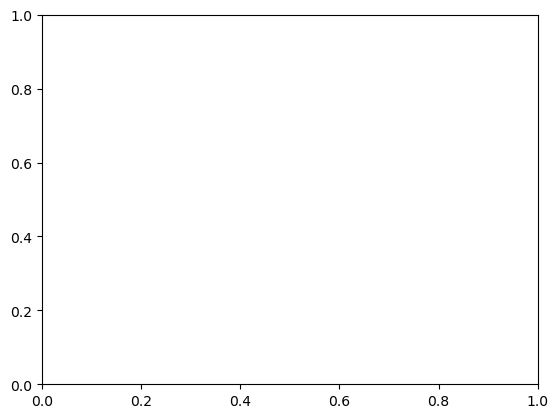

In [25]:
df = pd.read_csv(cuda_dir('sparse300_composition.csv'))

width = 0.5

fig, ax = plt.subplots()

total = cuda_total_time(df)

cpu_fractions = df['t_cpu'] / total
min_from_cluster_fractions = df['t_min_from_cluster_kernel'] / total
min_to_cluster_fractions = df['t_min_to_cluster_kernel'] / total
DtoH_fractions = df['t_DtoH'] / total
HtoD_fractions = df['t_HtoD'] / total

fractions = [cpu_fractions, min_from_cluster_fractions, min_to_cluster_fractions, DtoH_fractions, HtoD_fractions] 
fractions_name = ["cpu", "kernel_min_from_cluster", "kernel_min_to_cluster", "DtoH", "HtoD"]
x = tuple([str(i) for i in df['num_vertices']])

# Draw bar
for i in range(len(fractions)):
    if i == 0:
        ax.bar(x, fractions[i], width, label=fractions_name[i])
        fractions_sum = fractions[i]
    else:
        ax.bar(x, fractions[i], width, label=fractions_name[i], bottom=fractions_sum)
        fractions_sum += fractions[i]

ax.set_title("MST_loglogn CUDA time composition (sparse300 graph)")
ax.legend(loc="upper right")
plt.xlabel('Number of vertices')
plt.ylabel('Composition (percentage)')
plt.xticks(
    ticks=x,
    labels=df["num_vertices"].astype(str),
    rotation=90
)


plt.savefig('figs/mpi_composition_cuda_sparse300.pdf', format="pdf", bbox_inches="tight")


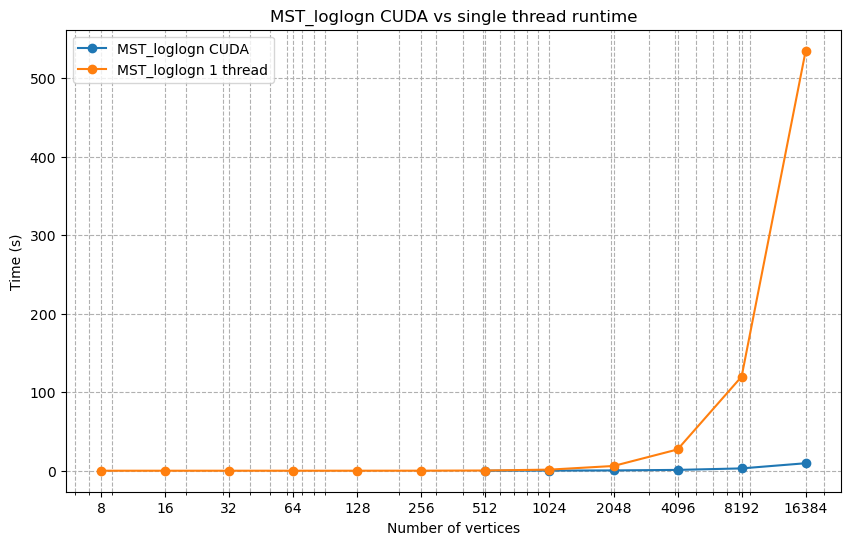

In [26]:
df_cuda = pd.read_csv(cuda_dir('complete_composition.csv'))

df_mpi_1 = pd.read_csv(cpp_dir('n1_t1.csv'))

# Plotting
plt.figure(figsize=(10, 6))
# CUDA time is in ms
plt.plot(df_cuda['num_vertices'], df_cuda['t_total']/1000, label="MST_loglogn CUDA", marker='o')
plt.plot(df_mpi_1['num_vertices'], df_mpi_1['t_total'], label="MST_loglogn 1 thread", marker='o')

plt.xlabel('Number of vertices')
plt.ylabel('Time (s)')
plt.title("MST_loglogn CUDA vs single thread runtime")
plt.legend()

plt.xscale('log')
plt.xticks(df_mpi_1['num_vertices'], df_mpi_1['num_vertices'])

plt.grid(True, which="both", ls="--")
plt.savefig("figs/MST_loglogn_CUDA_vs_single_thread.pdf", format="pdf", bbox_inches="tight")


In [27]:
df_complete = pd.read_csv(cuda_dir('complete_composition.csv'))

df_sparse100 = pd.read_csv(cuda_dir('sparse100_composition.csv'))
df_sparse200 = pd.read_csv(cuda_dir('sparse200_composition.csv'))
df_sparse300 = pd.read_csv(cuda_dir('sparse300_composition.csv'))

# Plotting
plt.figure(figsize=(10, 6))
# CUDA time is in ms
plt.plot(df_complete['num_vertices']**2, cuda_total_time(df_complete)/1000, label="MST_loglogn complete", marker='o')
plt.plot(df_sparse100['num_vertices']*100, cuda_total_time(df_sparse100)/1000, label="MST_loglogn sparse 100", marker='o')
plt.plot(df_sparse200['num_vertices']*200, cuda_total_time(df_sparse200)/1000, label="MST_loglogn sparse 200", marker='o')
plt.plot(df_sparse300['num_vertices']*300, cuda_total_time(df_sparse300)/1000, label="MST_loglogn sparse 300", marker='o')

plt.xlabel('Number of edges')
plt.ylabel('Time (s)')
plt.title("CUDA MST_loglogn complete vs sparse graph runtime")
plt.legend()

plt.xscale('log')
plt.xticks(df_complete['num_vertices']**2, df_complete['num_vertices']**2)

plt.grid(True, which="both", ls="--")
plt.savefig("figs/MST_loglogn_complete_vs_sparse_graph.pdf", format="pdf", bbox_inches="tight")


NameError: name 'cuda_total_time' is not defined

<Figure size 1000x600 with 0 Axes>